# Labolatorium 6

Na podstawie danych Głównego Inspektoratu Środowiska ze stacji pomiarowej Kraków, ul. Złoty Róg (znajdują się na Teams) opracuj model do przewidywania stężenia pyłów zawieszonych PM-10. Przeprowadź badania różnych architektur modeli sekwencyjnych.


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Wczytanie i preprocessing danych

In [ ]:
file_path = 'gios-pjp-data.csv'
data = pd.read_csv(
    file_path,
    sep=',',
    skiprows=1,
    usecols=[0, 1],
    names=["Date", "PM10"],
    engine='python'
)

data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'])

scaler = MinMaxScaler(feature_range=(0, 1))
data['PM10'] = scaler.fit_transform(data['PM10'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

dataset = data['PM10'].values
dataset = dataset.reshape(-1, 1)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Wizualizacja danych

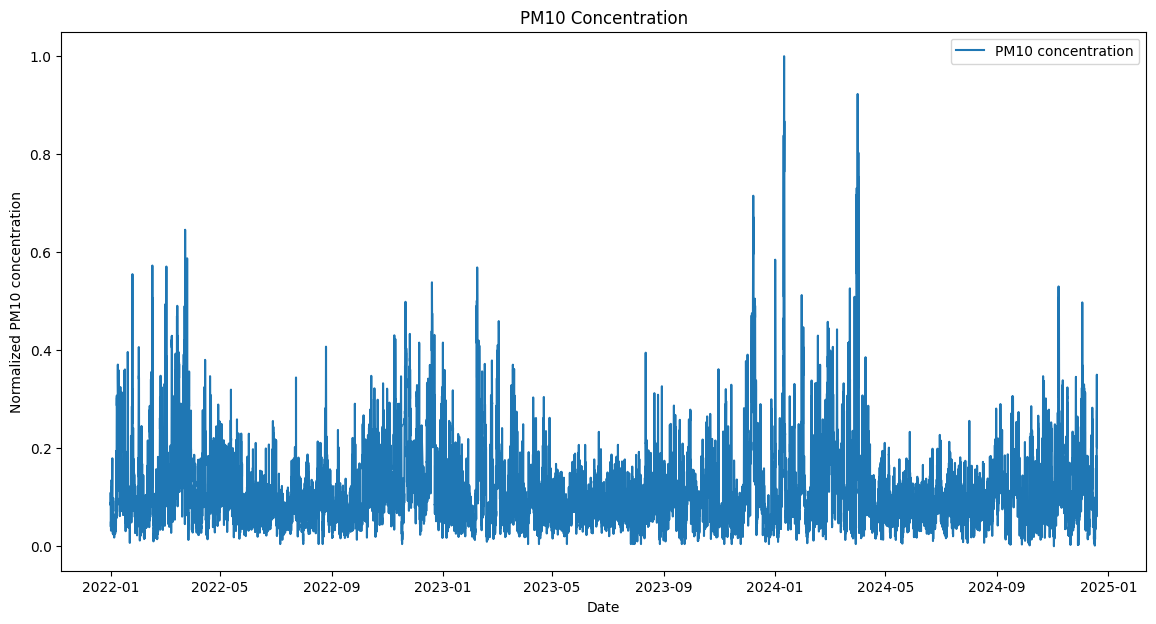

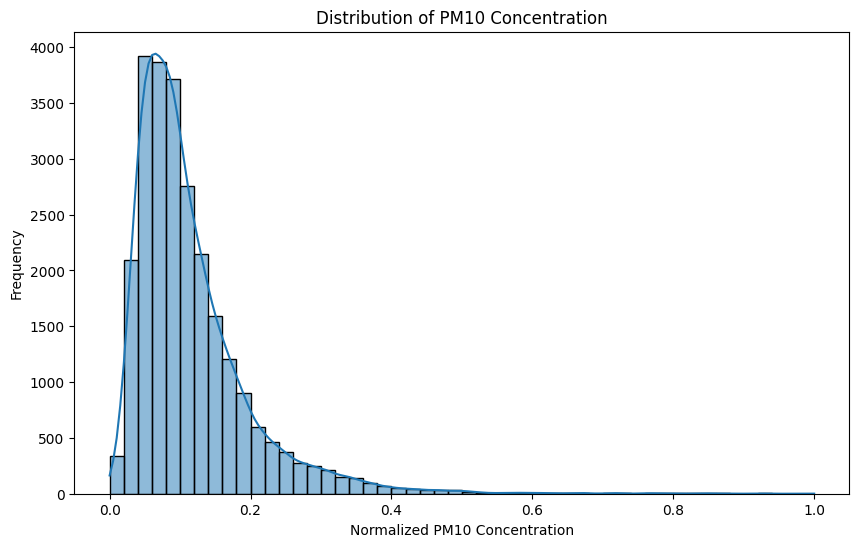

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['PM10'], label='PM10 concentration')
plt.xlabel('Date')
plt.ylabel('Normalized PM10 concentration')
plt.title('PM10 Concentration')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['PM10'], bins=50, kde=True)
plt.title('Distribution of PM10 Concentration')
plt.xlabel('Normalized PM10 Concentration')
plt.ylabel('Frequency')
plt.show()

### Przygotowanie danych

In [66]:

dataset = data['PM10'].values
dataset = dataset.reshape(-1, 1)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Budowanie i trenowanie modelu

Epoch 1/20


/Users/krzysztofbabicki/Documents/Edukacja/WSEI/WSEI - Semestr I/Zaawansowane metody sztucznej inteligencji/Laby/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0046 - val_loss: 8.5799e-04
Epoch 2/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - loss: 8.7330e-04 - val_loss: 8.4986e-04
Epoch 3/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 8.8889e-04 - val_loss: 8.3985e-04
Epoch 4/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - loss: 8.9225e-04 - val_loss: 8.4437e-04
Epoch 5/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 9.0052e-04 - val_loss: 8.3600e-04
Epoch 6/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 9.2112e-04 - val_loss: 8.6924e-04
Epoch 7/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 9.4476e-04 - val_loss: 8.3367e-04
Epoch 8/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 8.8766e-04 - val_loss: 8.4908e-04
Epoch 9/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 9.2048e-04 - val_loss: 8.4925e-04
Epoch 10/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 8.5375e-04 - val_loss: 8.7595e-04
Epoch 11/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step -

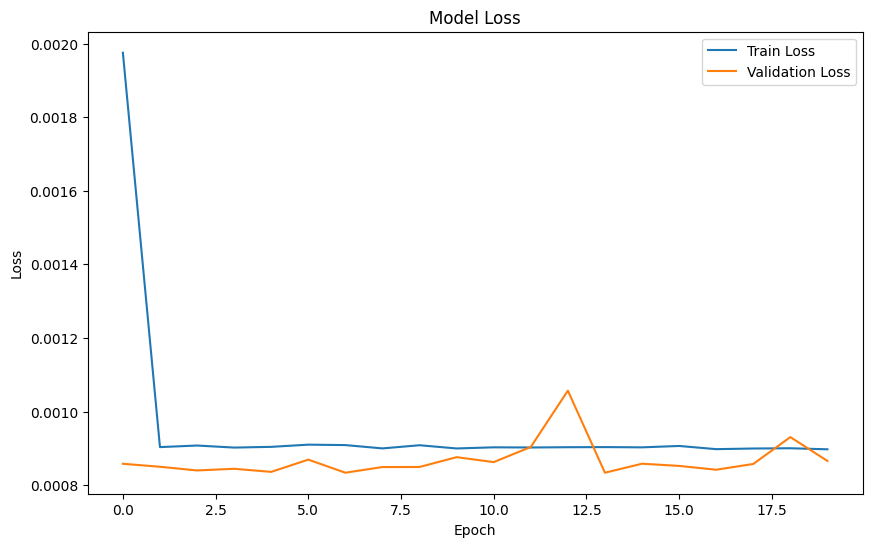

In [67]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Zachowanie Modelu

636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
Train Score: 27.53 RMSE
Test Score: 19.39 RMSE


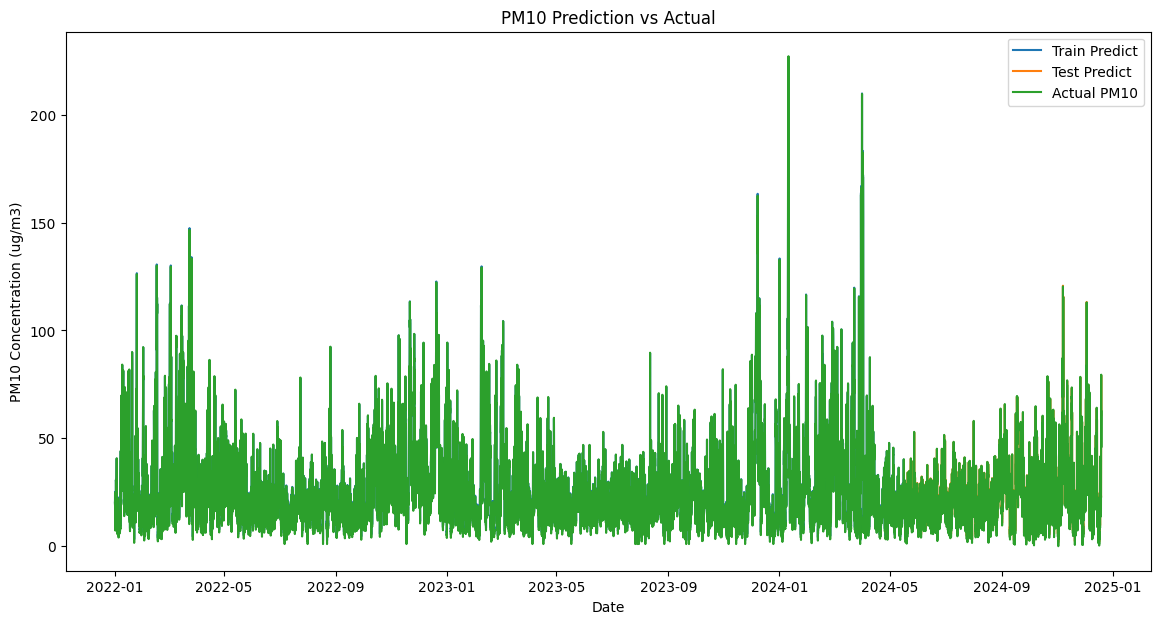

In [68]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

train_score = np.sqrt(np.mean((train_predict - Y_train[0])**2))
test_score = np.sqrt(np.mean((test_predict - Y_test[0])**2))
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

plt.figure(figsize=(14, 7))
plt.plot(data['Date'][:len(train_predict)], train_predict, label='Train Predict')
plt.plot(data['Date'][len(train_predict) + look_back + 1:len(train_predict) + look_back + 1 + len(test_predict)], test_predict, label='Test Predict')
plt.plot(data['Date'], scaler.inverse_transform(dataset), label='Actual PM10')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration (ug/m3)')
plt.title('PM10 Prediction vs Actual')
plt.legend()
plt.show()

### Architektura LSTM i GRU

Epoch 1/20


/Users/krzysztofbabicki/Documents/Edukacja/WSEI/WSEI - Semestr I/Zaawansowane metody sztucznej inteligencji/Laby/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 774.8242 - val_loss: 172.3873
Epoch 2/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 301.7752 - val_loss: 62.4556
Epoch 3/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 151.0886 - val_loss: 52.6579
Epoch 4/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 119.2973 - val_loss: 49.0454
Epoch 5/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 84.8416 - val_loss: 46.7653
Epoch 6/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 79.9234 - val_loss: 45.7338
Epoch 7/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.7269 - val_loss: 45.2579
Epoch 8/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - loss: 65.5776 - val_loss: 45.2312
Epoch 9/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - loss: 57.6612 - val_loss: 45.1482
Epoch 10/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 60.8959 - val_loss: 44.6506
Epoch 11/20
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 55.2133 - val_loss: 43.9869
Epoch 12/20
636/63

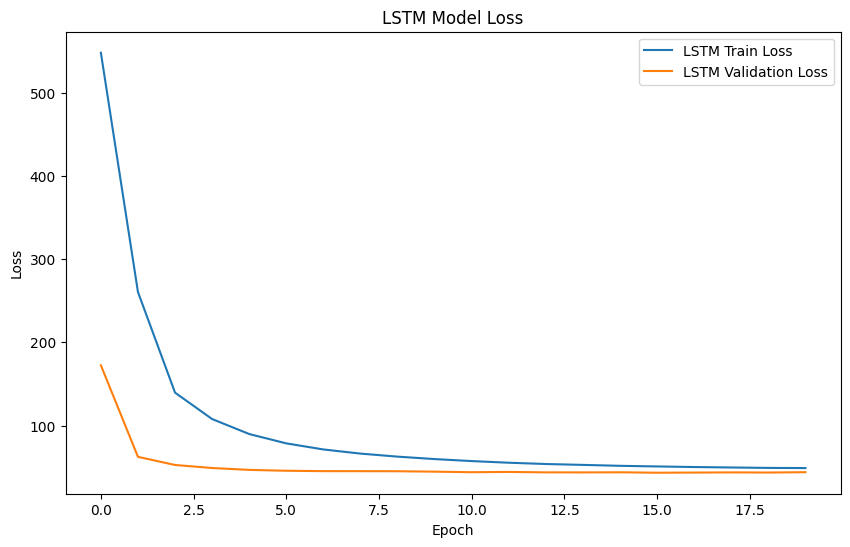

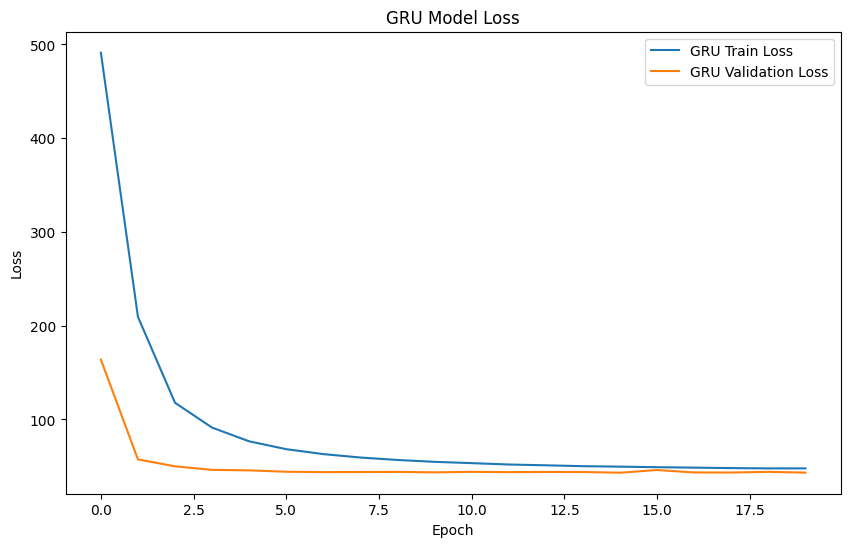

636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
LSTM Train Score: 4463.95 RMSE
LSTM Test Score: 4349.69 RMSE
636/636 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
GRU Train Score: 4330.52 RMSE
GRU Test Score: 4269.81 RMSE


In [69]:
from tensorflow.keras.layers import GRU

# Build and Train LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
Y_train = Y_train.reshape(-1, 1)
lstm_history = lstm_model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test.reshape(-1, 1)), verbose=1)

# Build and Train GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(1, look_back)))
gru_model.add(GRU(50))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
Y_train = Y_train.reshape(-1, 1)
gru_history = gru_model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test.reshape(-1, 1)), verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

lstm_train_predict = lstm_model.predict(X_train)
lstm_test_predict = lstm_model.predict(X_test)

lstm_train_predict = scaler.inverse_transform(lstm_train_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test)

lstm_train_score = np.sqrt(np.mean((lstm_train_predict - Y_train[0])**2))
lstm_test_score = np.sqrt(np.mean((lstm_test_predict - Y_test[0])**2))
print(f'LSTM Train Score: {lstm_train_score:.2f} RMSE')
print(f'LSTM Test Score: {lstm_test_score:.2f} RMSE')

gru_train_predict = gru_model.predict(X_train)
gru_test_predict = gru_model.predict(X_test)

gru_train_predict = scaler.inverse_transform(gru_train_predict)
gru_test_predict = scaler.inverse_transform(gru_test_predict)

gru_train_score = np.sqrt(np.mean((gru_train_predict - Y_train[0])**2))
gru_test_score = np.sqrt(np.mean((gru_test_predict - Y_test[0])**2))
print(f'GRU Train Score: {gru_train_score:.2f} RMSE')
print(f'GRU Test Score: {gru_test_score:.2f} RMSE')